In [36]:
import gym_bondgraph
import gymnasium as gym
from bond_graph import *

%reload_ext autoreload
%autoreload 2

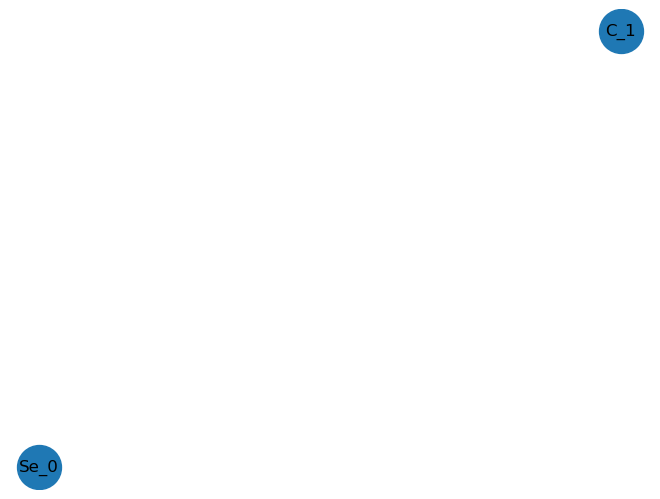

In [37]:
t_span = [0, 10]
time_array = np.linspace(t_span[0], t_span[1], 500)

s0 = BondGraph(max_nodes=10, max_states=4, time_array=time_array)
s0.add_element(EffortSource())
s0.add_element(Capacitance(0.1))
# s0.add_bond(1, 0, 1)

labels = nx.get_node_attributes(s0.flow_causal_graph, 'element_label')
nx.draw(s0.flow_causal_graph, labels=labels, with_labels=True, node_size=1000)


In [38]:
max_nodes = 20
default_params = {
    'R': 1,
    'I': 1,
    'C': 1,
}
env = gym.make('gym_bondgraph/BondGraphEnv-v4',  seed=420, seed_graph=s0, max_nodes=max_nodes, default_params=default_params)

In [39]:
env.reset()
# action = env.action_space.sample()
action = {
    'node_or_bond': 1, # 0 for add node, 1 for add edge
    "node_type": 1,
    "bond": [1, 0, 0], # 0 for negative bond sign, 1 for positive
    }

causal_adjacency_mask, power_flow_adjacency_mask = env.bond_graph.get_bond_addition_mask()

print("Causal Adjacency Mask: \n", causal_adjacency_mask)
print()
print("Power Flow Adjacency Mask: \n", power_flow_adjacency_mask)
print()

print("Action: ", action)



observation, reward, terminated, terminated, info = env.step(action)


Causal Adjacency Mask: 
 [[0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

Power Flow Adjacency Mask: 
 [[0 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 1 1 1 1 1 1]
 [0 1 1 0 1 1 1 1 1 1]
 [0 1 1 1 0 1 1 1 1 1]
 [0 1 1 1 1 0 1 1 1 1]
 [0 1 1 1 1 1 0 1 1 1]
 [0 1 1 1 1 1 1 0 1 1]
 [0 1 1 1 1 1 1 1 0 1]
 [0 1 1 1 1 1 1 1 1 0]]

Action:  {'node_or_bond': 1, 'node_type': 1, 'bond': [1, 0, 0]}


/opt/homebrew/Caskroom/miniconda/base/envs/bond-graph/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:188: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


In [40]:
print("Observation: ", observation)
print("Reward: ", reward)

Observation:  {'node_feature_space': array([3, 0]), 'adjacency_matrix_space': array([[0, 0],
       [0, 0]], dtype=int32)}
Reward:  -100


In [41]:
# action = env.action_space.sample()
action = {
    'node_or_bond': 0, # 0 for add node, 1 for add edge
    "node_type": 1,
    "bond": [0, 1, 1],
    }
print("Action: ", action)

observation, reward, terminated, terminated, info = env.step(action)
print("Observation: ", observation)
print("Reward: ", reward)

Action:  {'node_or_bond': 0, 'node_type': 1, 'bond': [0, 1, 1]}
Observation:  {'node_feature_space': array([3, 0, 1]), 'adjacency_matrix_space': array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int32)}
Reward:  -1


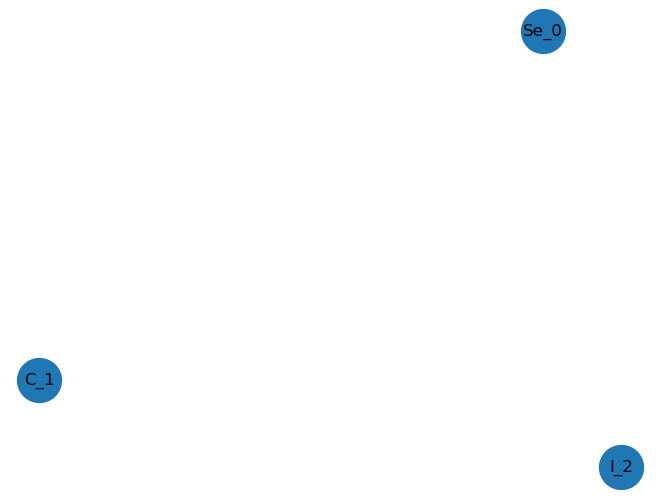

In [42]:
labels = nx.get_node_attributes(env.bond_graph.flow_causal_graph, 'element_label')
nx.draw(env.bond_graph.flow_causal_graph, labels=labels, with_labels=True, node_size=1000)